# Monte-Carlo Simulation of the Ising Model 

$$ H = -J \sum_{\langle ij \rangle} s_i s_j $$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

### 초기조건

In [25]:
# 초기조건 (L x L)
def init(L): 
    conf = 2*np.random.randint(2, size=(L,L))-1
    return conf

In [27]:
init(3)

array([[ 1,  1, -1],
       [-1, -1,  1],
       [-1,  1, -1]])

### 메트로폴리스 알고리즘

In [28]:
# monte-carlo steps (MCS) # Let k_B=1
def mcs(conf, beta):
    L = len(conf)
    for i in range(L*L): # n^2 steps
        x = np.random.randint(0, L) # randint(0,n): 0~n 사이에 정수를 random하게 
        y = np.random.randint(0, L)
        si = conf[x, y] # si (s1 + s2 + s3 + s4) 
        nei = conf[(x+1)%L,y] + conf[x,(y+1)%L] + conf[(x-1)%L,y] + conf[x,(y-1)%L] 
        # periodic boundary conditions
        dE = 2*si*nei # delta energy 

        # metropolis algorithm
        if dE < 0:
            si *= -1 # spin flip
        elif np.random.rand() < np.exp(-beta*dE):
            si *= -1
        conf[x, y] = si
    return conf

In [35]:
conf = init(3)
mcs(conf, 1)

array([[ 1,  1,  1],
       [ 1,  1, -1],
       [ 1,  1,  1]])

### simulations & measurements

In [114]:
# monte-carlo steps (MCS)
# L: size / n: monte-carlo steps 
def mag(conf): # magnetization
    L = len(conf)
    m = np.sum(conf)
    return m/L/L

def simulations(state,n,beta):
    # spin flips
    for i in range(n):
        mcs(state,beta)
    return state

In [120]:
L = 10
T =np.linspace(4,1,20)
M = []

state = init(L) # 초기 조건
ns = 10
for i in T:
    # equilibration
    simulations(state,100,1/i)
    m = 0
    for n in range(ns):
        conf=simulations(state,10,1/i)
        m = m+mag(conf)
    M.append(np.abs(m/ns))

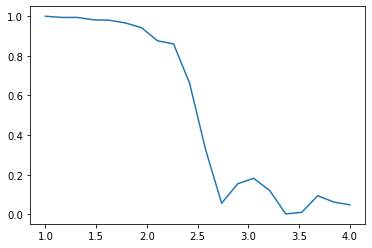

In [121]:
plt.plot(T,M)

In [122]:
conf

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

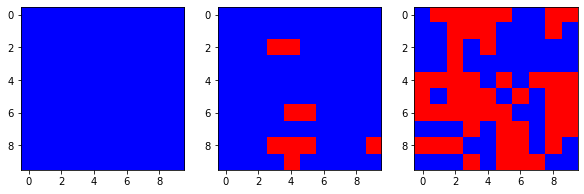

In [150]:
def exam(L,T):
    state = init(L) # 초기 조건
    config = simulations(state,500,1/T)
    return config

plt.figure(figsize=(10,3))
plt.subplot(131)
plt.imshow(exam(10,1), cmap= 'bwr')
plt.subplot(132)
plt.imshow(exam(10,2.269), cmap= 'bwr')
plt.subplot(133)
plt.imshow(exam(10,10), cmap= 'bwr')